In [1]:
from pymc import DiscreteUniform,Exponential,deterministic,Poisson,Uniform
import numpy as np

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
disasters_array =np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [5]:
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')

In [8]:
early_mean = Exponential('early_mean',beta=1.)
late_mean = Exponential('late_mean',beta=1)

In [9]:
@deterministic(plot=False)
def rate(s=switchpoint,e=early_mean,l=late_mean):
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

In [10]:
disasters = Poisson('disasters',mu=rate,value=disasters_array,observed=True)

In [11]:
from pymc.examples import disaster_model

In [12]:
disaster_model.switchpoint.parents

{'lower': 0, 'upper': 110}

In [13]:
disaster_model.disasters.parents

{'mu': <pymc.PyMCObjects.Deterministic 'rate' at 0x7f783e336650>}

In [15]:
disaster_model.rate.children

{<pymc.distributions.Poisson 'disasters' at 0x7f783e38afd0>}

In [16]:
disaster_model.disasters.value

array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1,
       4, 4, 1, 5, 5, 3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3,
       0, 0, 1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2,
       0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [17]:
disaster_model.switchpoint.value

array(52)

In [18]:
disaster_model.early_mean.value

array(0.3518787368689505)

In [19]:
disaster_model.late_mean.value

array(0.24250152023602448)

In [22]:
disaster_model.rate.value

array([ 0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.35187874,  0.35187874,  0.35187874,
        0.35187874,  0.35187874,  0.24250152,  0.24250152,  0.24250152,
        0.24250152,  0.24250152,  0.24250152,  0.24250152,  0.24250152,
        0.24250152,  0.24250152,  0.24250152,  0.24250152,  0.24250152,
        0.24250152,  0.24250152,  0.24250152,  0.24250152,  0.24

In [25]:
disaster_model.switchpoint.logp

-4.709530201312334

In [28]:
disaster_model.disasters.logp

-367.0106365887177

In [30]:
disaster_model.early_mean.logp

-0.3518787368689505

In [31]:
disaster_model.late_mean.logp

-0.24250152023602448

In [34]:
from pymc import MCMC
M = MCMC(disaster_model)

In [36]:
M.sample(iter=10000,burn=1000,thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 3.1 sec

In [39]:
M.trace('switchpoint')[:]

array([49, 49, 49, 49, 30, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 33, 33, 33, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 49, 40,
       40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
       40, 46, 37, 46, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39,
       39, 37, 43, 43, 43, 34, 34, 40, 40, 40, 40, 40, 40, 40, 42, 42, 36,
       46, 36, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 32, 42, 42, 42,
       46, 37, 37, 37, 46, 39, 39, 39, 39, 39, 39, 46, 41, 41, 36, 40, 37,
       41, 35, 40, 39, 40, 36, 40, 38, 39, 39, 39, 41, 37, 42, 37, 37, 40,
       46, 39, 43, 40, 39

(array([   2.,    8.,   76.,  162.,  259.,  202.,  125.,   53.,   10.,    3.]),
 array([ 0.52995957,  0.61332929,  0.69669902,  0.78006875,  0.86343847,
         0.9468082 ,  1.03017793,  1.11354765,  1.19691738,  1.28028711,
         1.36365683]),
 <a list of 10 Patch objects>)

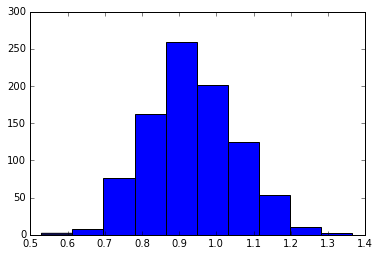

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(M.trace('late_mean')[:])

In [41]:
from pymc.Matplot import plot

Plotting early_mean
Plotting late_mean
Plotting switchpoint


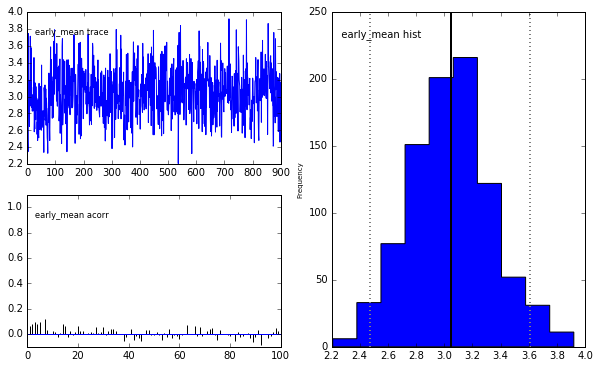

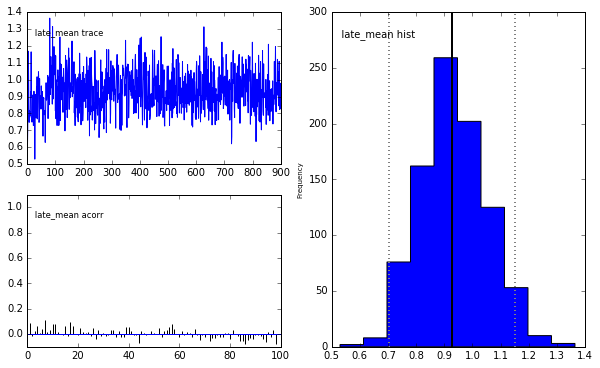

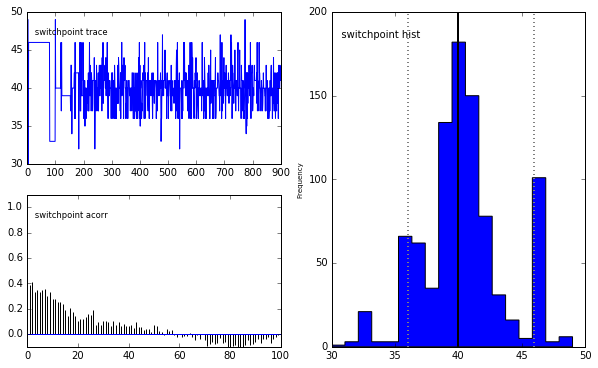

In [42]:
plot(M)